In [ ]:
#Packages
!pip install BeautifulSoup4
!pip install lxml
!pip install html5lib
!pip install nltk==3.2.5
!pip install pdfplumber
!pip install -U spacy
!python -m spacy download en
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.2.5-py3-none-any.whl size=1392143 sha256=be2b13a89505a16f7f0e6bcedf140f3c5722ac91832fc12d8a2f4541904646aa
  Stored in directory: /root/.cache/pip/wheels/50/d6/35/4a8a48ea9fe03abae30da7971b8ed2a350436bebc00541372b
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 60.1 MB/s eta 0:00:00
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 66.8 MB/s eta 0:00:00
✔ Download and

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter
from nltk.corpus import stopwords
import spacy
from html import unescape
import pdfplumber
from datetime import datetime
import datetime as dt

import urllib
import urllib.request
from bs4 import BeautifulSoup
from bs4 import re
import requests
import re
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.tokenize import word_tokenize

#Modelul SpaCy
nlp = spacy.load("en_core_web_sm")

# Adaugare stop words la cele de la SpaCy
all_stopwords = nlp.Defaults.stop_words
custom_stopwords = {'the', 'is', 'th', 's', 'm', 'would'}
all_stopwords |= custom_stopwords

# Tokenizare cu NLTK si eliminare de stopwords cu SpaCy
def tokenize_and_remove_stopwords(text):

    word_tokens = word_tokenize(text)

    filtered_sentence = [word for word in word_tokens if word.lower() not in all_stopwords]
    return filtered_sentence

#Test
text = "This is an example sentence demonstrating the use of spaCy and NLTK."
filtered_text = tokenize_and_remove_stopwords(text)
print(filtered_text)

['example', 'sentence', 'demonstrating', 'use', 'spaCy', 'NLTK', '.']


In [ ]:
def my_preprocessor(doc):
  return(unescape(doc).lower())

In [ ]:
def my_tokenizer(doc):

    text = word_tokenize(doc)
    tokens_without_sw= [word for word in text if not word in all_stopwords]

    return tokens_without_sw

In [ ]:
def preprocess_tokens(tokens):
  '''
  Remove any extra lines, non-letter characters, and blank quotes
  '''
  remove_new_lines = [re.sub('\s+', '', token) for token in tokens]
  #Non letter characters - eliminare
  non_letters = [re.sub('[^a-zA-Z]', '', remove_new_line) for remove_new_line in remove_new_lines]
  #Sistracting single quotes - eliminare
  remove_quotes = [re.sub("\'", '', non_letter) for non_letter in non_letters]
  #Empty strings from a list of strings - eliminare
  final = list(filter(None, remove_quotes))

  return final

In [ ]:
def concat_text(text):
    x=''
    for i in text:
        x = x+i
    return x

In [ ]:
def get_text(path):
  docs = []
  with pdfplumber.open(path) as pdf:
    for i in range(len(pdf.pages)):
      page = pdf.pages[i]
      text = page.extract_text()
      docs.append(text)
    concat = concat_text(docs)
  return concat

In [ ]:
def get_text(path):  #file is the path
  docs = []
  with pdfplumber.open(path) as pdf:
    for i in range(len(pdf.pages)):
      page = pdf.pages[i]
      text = page.extract_text()
      docs.append(text)
    concat = concat_text(docs)
  return concat

In [ ]:
def get_words(full_text):

  raw = [word.lower() for word in full_text.split()]

  values = ','.join(map(str, raw))  #converts bytes object to string
  tokenizer = my_tokenizer(values)

  words = preprocess_tokens(tokenizer)
  # remove stopwords
  stops = nltk.corpus.stopwords.words('english')
  new_stopwords = ['chairman','would', 'mr']
  stops.extend(new_stopwords)
  words = [word for word in words if word not in stops]
  counter = Counter()
  counter.update(words)
  most_common = counter.most_common(25)

  return words, most_common

In [ ]:
path_to_local_pdf = True

if path_to_local_pdf or path_to_local_txt:
    base_directory = "/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/"

In [ ]:
link1 = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/2000/FOMC20000201meeting.pdf'
link2 = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1980/FOMC19800109meeting.pdf'
link3 = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/feddata/1982/FOMC19820701meeting.pdf'

text = (get_text(link3))

len(text)

6382

In [ ]:
import pandas as pd

# Path to the CSV file on your local machine or cloud storage
data_path = '/content/drive/MyDrive/Colab Notebooks/Projects/FOMC_NLP/fomc_transcript_tokens_from_1972.csv'

# Load the data
data = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')

# Display the first 10 rows of the Date column
print(data.index[:10])


DatetimeIndex(['1972-01-11', '1972-03-21', '1972-05-23', '1972-06-20',
               '1972-08-15', '1972-09-19', '1972-10-17', '1972-12-19',
               '1973-01-16', '1973-03-20'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
print(data.index[:10])

DatetimeIndex(['1972-01-11', '1972-03-21', '1972-05-23', '1972-06-20',
               '1972-08-15', '1972-09-19', '1972-10-17', '1972-12-19',
               '1973-01-16', '1973-03-20'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
# Count the number of rows
row_count = data.shape[0]

# Display the row count
print(f'The number of rows in the data set is: {row_count}')

The number of rows in the data set is: 447


In [ ]:
import pandas as pd

# Assuming Data is already loaded and contains the 'top_tokens' column

# Create a DataFrame to store word counts
word_df = pd.DataFrame(columns=['Words', 'Count'])

for i in range(len(data)):  # total links
    word_count = {'Words': [], 'Count': []}
    top_tokens = data['top_tokens'][i]

    # Check if top_tokens is a string that needs conversion
    if isinstance(top_tokens, str):
        # Attempt to safely convert string to list of tuples
        import ast
        try:
            top_tokens = ast.literal_eval(top_tokens)
        except (ValueError, SyntaxError):
            print(f"Skipping invalid top_tokens at index {i}: {top_tokens}")
            continue

    # Process each set of top tokens
    for sets in top_tokens:
        print(f"Processing: {sets}")  # Debug print
        if isinstance(sets, (list, tuple)) and len(sets) == 2:
            word_count['Words'].append(sets[0])  # total words broken out
            word_count['Count'].append(sets[1])  # total count per word
        else:
            print(f"Skipping invalid sets at index {i}: {sets}")

    word_df1 = pd.DataFrame(word_count)
    word_df = pd.concat([word_df, word_df1], ignore_index=True)

# Group by words and sum the counts
total_words = word_df.groupby(['Words']).sum()

# Sort by count in descending order and get the top 25 words
sorted_top_words = total_words.sort_values(by='Count', ascending=False).head(25)

print(sorted_top_words)


Streaming output truncated to the last 5000 lines.
Processing: ('federal', 38)
Processing: ('open', 30)
Processing: ('members', 29)
Processing: ('markets', 27)
Processing: ('growth', 27)
Processing: ('inflation', 27)
Processing: ('prices', 27)
Processing: ('period', 25)
Processing: ('economic', 25)
Processing: ('reserve', 24)
Processing: ('recent', 23)
Processing: ('year', 22)
Processing: ('quarter', 22)
Processing: ('transactions', 21)
Processing: ('months', 21)
Processing: ('meeting', 20)
Processing: ('july', 19)
Processing: ('new', 18)
Processing: ('operations', 18)
Processing: ('system', 17)
Processing: ('securities', 17)
Processing: ('agreements', 17)
Processing: ('remained', 17)
Processing: ('committee', 32)
Processing: ('inflation', 28)
Processing: ('prices', 26)
Processing: ('members', 22)
Processing: ('growth', 22)
Processing: ('period', 20)
Processing: ('year', 20)
Processing: ('market', 18)
Processing: ('meeting', 17)
Processing: ('markets', 17)
Processing: ('continued', 17)

In [ ]:
print(data.columns)

Index(['Transcript', 'all_words', 'top_tokens'], dtype='object')


In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [ ]:
import pandas as pd
import re
from nltk.corpus import opinion_lexicon

word_list = {
    'Positive': list(opinion_lexicon.positive()),
    'Negative': list(opinion_lexicon.negative())
}

negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

def negated(word):
    """Determine if preceding word is a negation word"""
    return word.lower() in negate

def count_with_negation(fin_dict, transcript):
    """Count positive and negative words with negation check"""
    pos_count = 0
    neg_count = 0
    pos_words = []
    neg_words = []
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', transcript.lower())
    word_count = len(input_words)
    for i in range(0, word_count):
        if input_words[i] in fin_dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in fin_dict['Positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])
    results = [word_count, pos_count, neg_count, pos_words, neg_words]
    return results

temp = [count_with_negation(word_list, x) for x in data.Transcript]
temp = pd.DataFrame(temp)
data['wordcount'] = temp.iloc[:, 0].values
data['NPositiveWords'] = temp.iloc[:, 1].values
data['NNegativeWords'] = temp.iloc[:, 2].values
data['Poswords'] = temp.iloc[:, 3].values
data['Negwords'] = temp.iloc[:, 4].values

temp.head()


,0,1,2,3,4
0,812,6,11,"[permissible, modest, consistent, sustainable,...","[burns, vice, miss, vice, craven, vice, vice, ..."
1,4508,48,57,"[qualified, qualify, pleasure, satisfactory, s...","[burns, vice, miss, vice, vice, vice, vice, bu..."
2,895,16,15,"[respect, respect, maturity, maturity, faster,...","[burns, vice, miss, vice, craven, vice, vice, ..."
3,1021,9,10,"[faster, advanced, savings, well, outstanding,...","[burns, miss, miss, vice, craven, vice, vice, ..."
4,832,10,18,"[respect, rapid, rapid, quiet, rapid, savings,...","[burns, vice, vice, craven, vice, vice, vice, ..."


In [ ]:
# Display the last 10 rows of the Data DataFrame
data.tail(10)

,Transcript,all_words,top_tokens,wordcount,NPositiveWords,NNegativeWords,Poswords,Negwords
Date,,,,,,,,
2023-03-22,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 84), ('board', 71), ('participa...",7711,164,147,"[effective, stability, stability, good, resili...","[vice, vice, vice, vice, burns, vice, vice, bu..."
2023-05-03,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 78), ('board', 76), ('participa...",8507,187,206,"[stability, lead, stability, eased, smoothly, ...","[vice, vice, vice, bump, vice, vice, vice, vic..."
2023-06-14,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 82), ('board', 69), ('participa...",7300,157,141,"[stability, stability, sensitive, maturity, he...","[vice, burns, vice, vice, vice, vice, vice, vi..."
2023-07-26,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 69), ('board', 67), ('federal',...",7165,167,132,"[stability, stability, easing, robust, softer,...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2023-09-20,_ ____________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('board', 66), ('participants', 61), ('inflat...",6827,155,137,"[stability, stability, sensitive, appreciated,...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2023-11-01,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('board', 69), ('inflation', 61), ('participa...",7148,148,133,"[stability, stability, stability, well, strong...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2023-12-13,_ ____________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('inflation', 71), ('board', 61), ('participa...",7096,173,139,"[stability, stability, eased, supported, notab...","[vice, vice, vice, burns, vice, vice, vice, de..."
2024-01-31,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('federal', 70), ('participants', 69), ('boar...",7790,192,158,"[stability, stability, pleasure, satisfactory,...","[vice, vice, vice, vice, vice, vice, vice, vic..."
2024-03-20,______________________________________________...,"['page', 'minutes', 'federal', 'open', 'market...","[('board', 74), ('rate', 62), ('participants',...",7562,195,145,"[stability, stability, eased, strong, gains, r...","[vice, vice, vice, vice, vice, slow, vice, vic..."


In [ ]:
Data = data

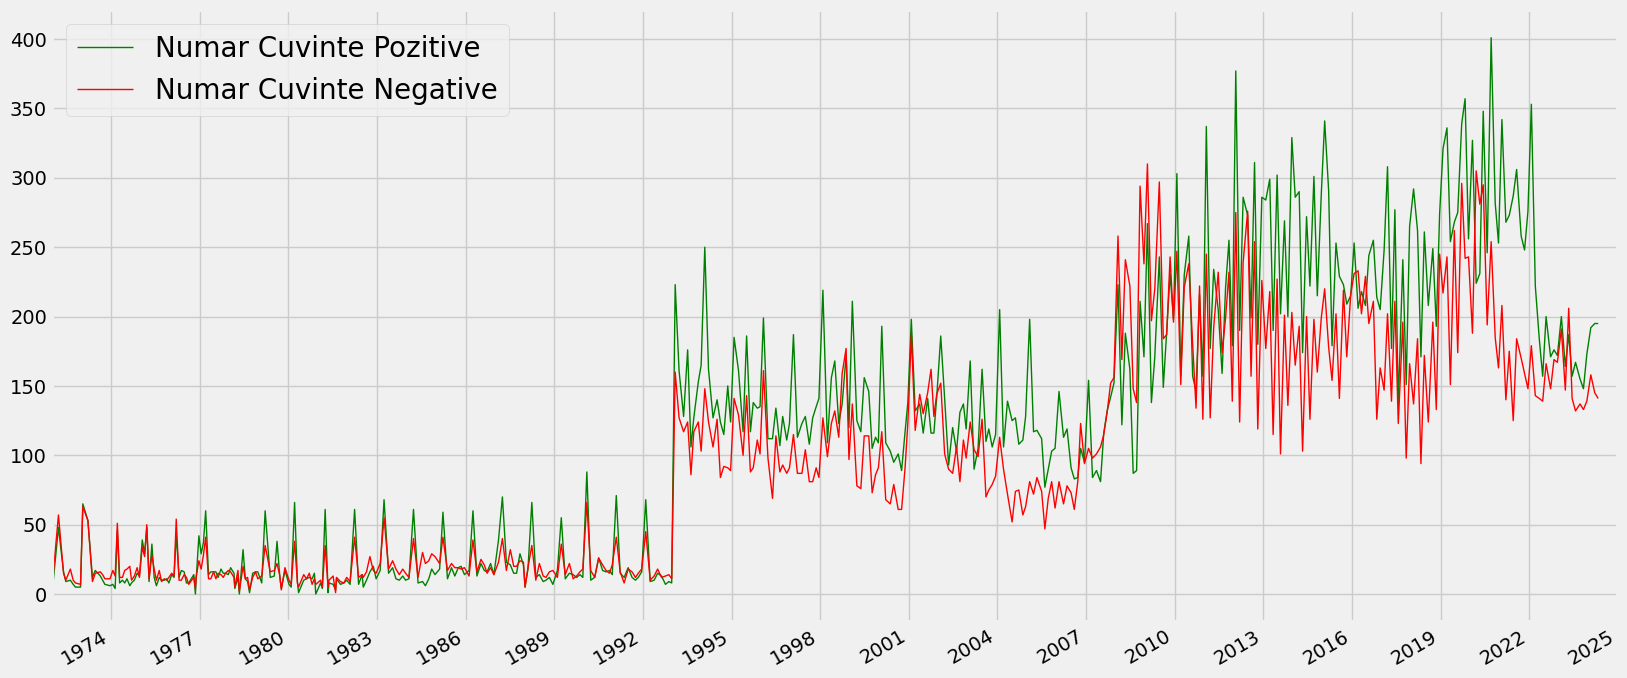

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

# Assuming the date information is in the index and not in a column
# If the index contains the dates, let's reset the index to access the date
Data.reset_index(inplace=True)

# Rename the first column to 'Date' if necessary
Data.rename(columns={'index': 'Date'}, inplace=True)

# Ensure that the 'Date' column is in datetime format
Data['Date'] = pd.to_datetime(Data['Date'], errors='coerce')

# Remove rows with invalid dates if any
Data = Data.dropna(subset=['Date'])

# Set the 'Date' column as the index
Data.set_index('Date', inplace=True)

# Plotting
plt.rcParams["figure.figsize"] = (18, 9)
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

ax.plot(Data.index, Data['NPositiveWords'], c='green', linewidth=1.0)
ax.plot(Data.index, Data['NNegativeWords'], c='red', linewidth=1.0)

plt.legend(['Numar Cuvinte Pozitive', 'Numar Cuvinte Negative'], prop={'size': 20}, loc=2)

# Format the ticks
years = mdates.YearLocator(3)   # every 3 years
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(Data.index[0], 'Y')
datemax = np.datetime64(Data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

plt.savefig('fomc_correlated_words.png', dpi=60, bbox_inches="tight")
plt.show()


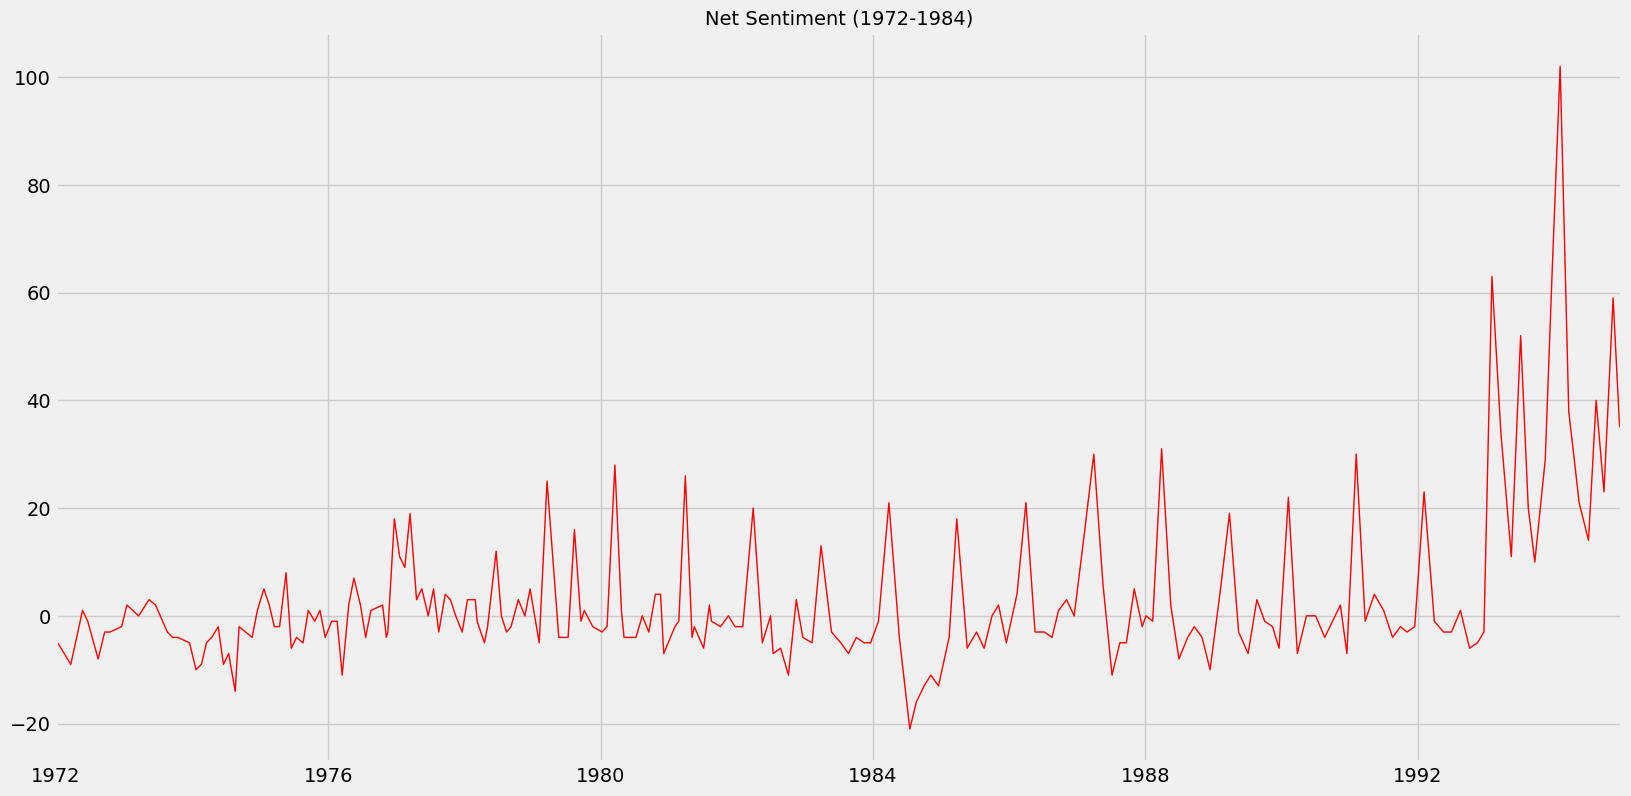

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

# Assuming Data is a DataFrame with a datetime index and columns 'NPositiveWords' and 'NNegativeWords'

# Calculate Net Sentiment
NetSentiment = Data['NPositiveWords'] - Data['NNegativeWords']

# Filter data for the period 1972-1984
start_date = '1972-01-01'
end_date = '1994-12-31'
filtered_data = Data.loc[start_date:end_date]
filtered_net_sentiment = NetSentiment.loc[start_date:end_date]

# Create plot
fig, ax = plt.subplots()

ax.plot(filtered_data.index, filtered_net_sentiment, c='red', linewidth=1.0)

plt.title('Net Sentiment (1972-1984)', size='medium')

# Format the ticks
datemin = np.datetime64(filtered_data.index[0], 'Y')
datemax = np.datetime64(filtered_data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# Save and show the plot
plt.savefig('fomc_net_sentiment_1972_1984.png', dpi=60, bbox_inches='tight')
plt.show()

# Optional: Download the file if running in an environment that supports it
# files.download('fomc_net_sentiment_1972_1984.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

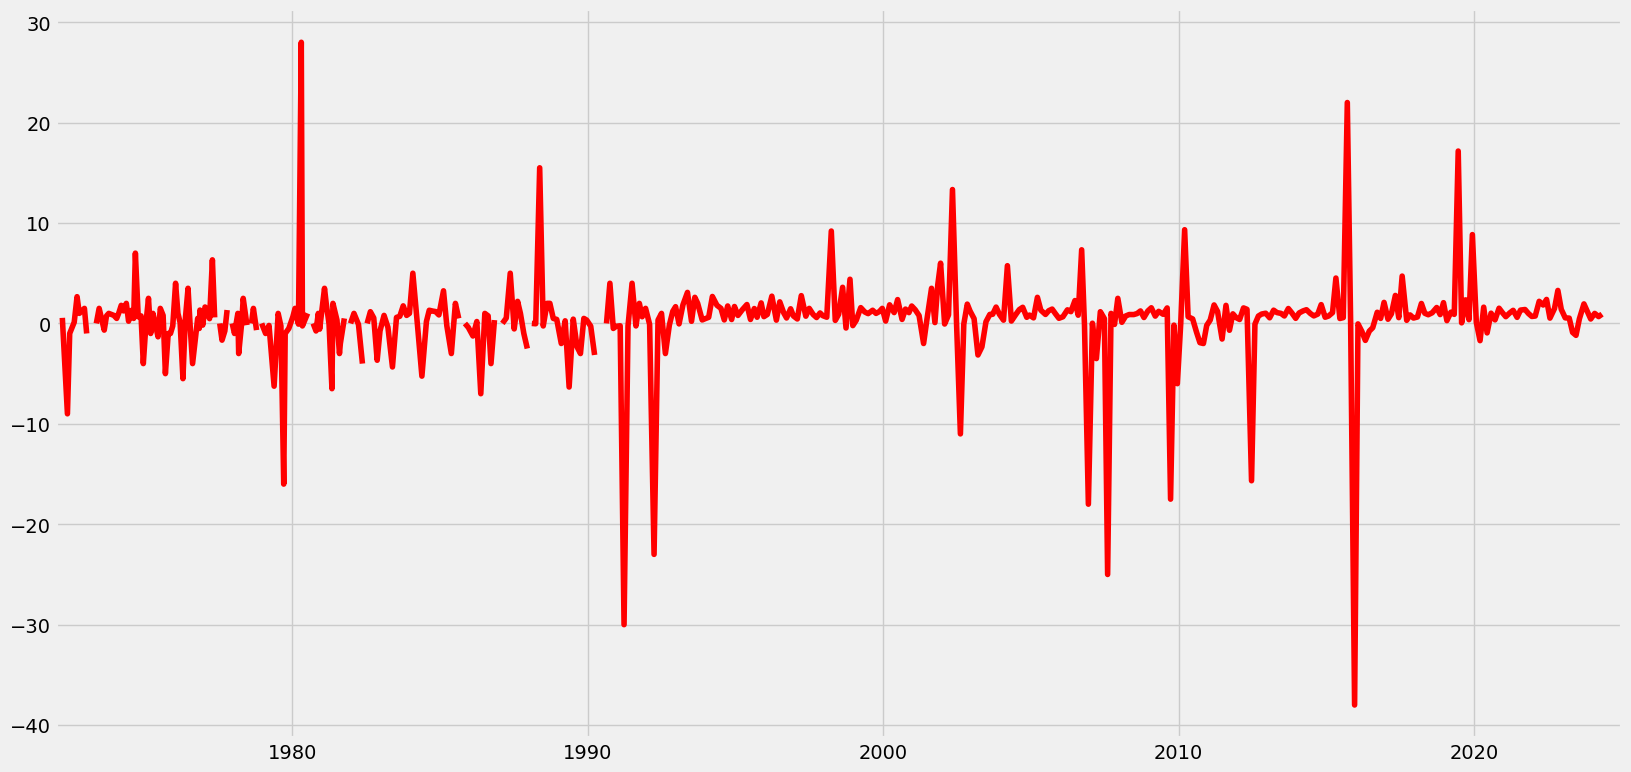

In [ ]:
firstderivative = (NetSentiment.shift(1) / NetSentiment)

fig, ax = plt.subplots()

ax.plot(Data.index, firstderivative,
         c = 'red')

plt.title('')

# format the ticks
# round to nearest years.
datemin = np.datetime64(Data.index[0], 'Y')
datemax = np.datetime64(Data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

plt.savefig('fomc_sentiment_chg.png',dpi=60, bbox_inches = "tight")
files.download('fomc_sentiment_chg.png');

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

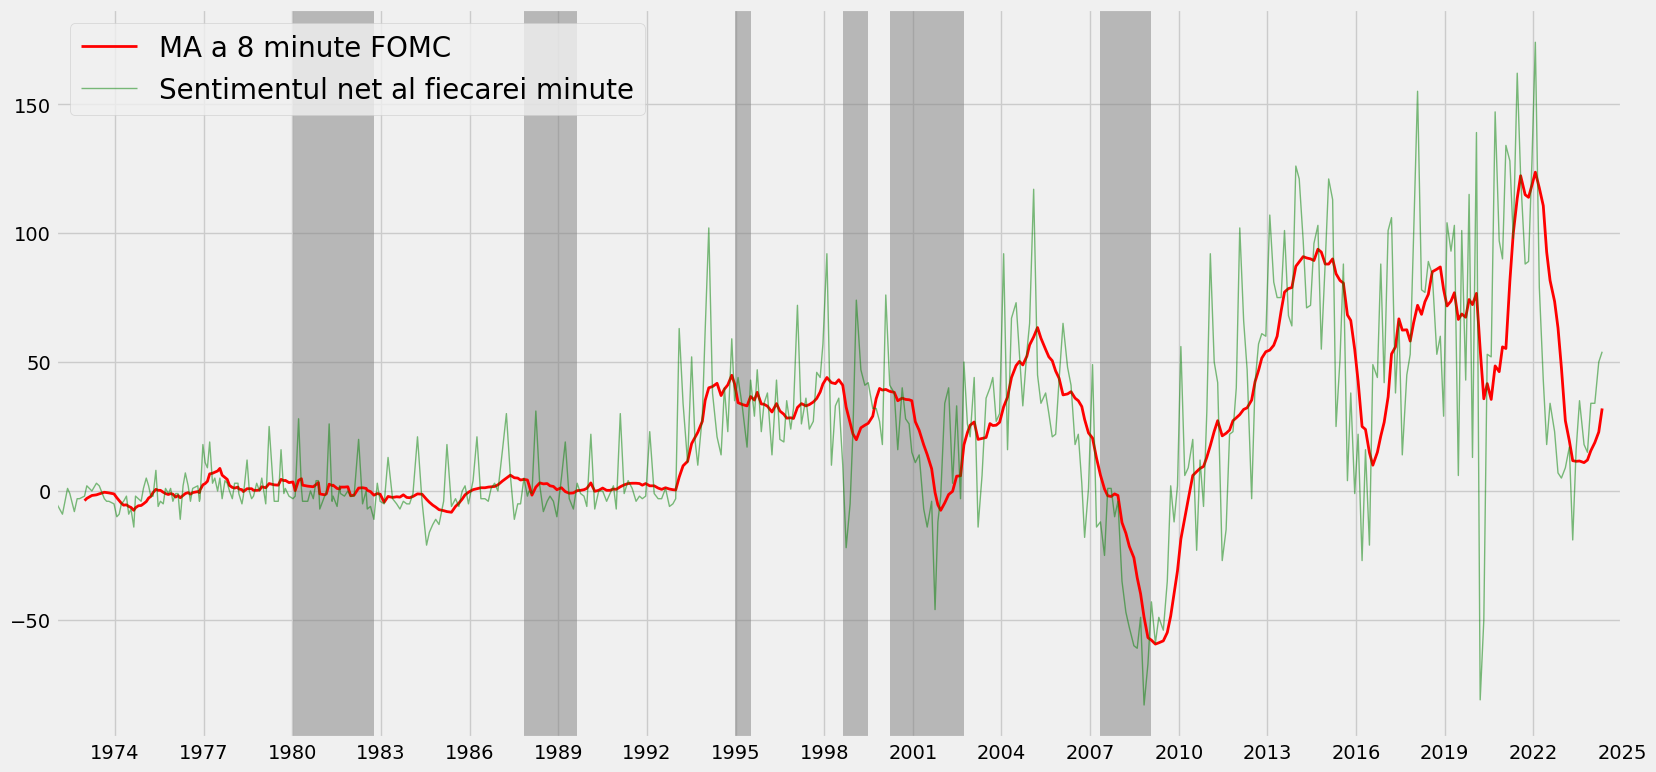

In [ ]:
#1979 Iranian Oil Crisis
#https://en.wikipedia.org/wiki/1979_oil_crisis
Oil = np.logical_and(Data.index > '1980-01',
                          Data.index < '1982-11'
                          )

#Black Monday and the time period till US Equity market recovery
#https://en.wikipedia.org/wiki/Black_Monday_(1987)
BlkMonday = np.logical_and(Data.index > '1987-10',
                          Data.index < '1989-09'
                          )
#1994-1995 Mexican Peso crisis
#https://en.wikipedia.org/wiki/1998_Russian_financial_crisis
Peso = np.logical_and(Data.index > '1994-12',
                       Data.index < '1995-08'
                       )

#1998–1999 Russian Ruble crisis
#https://en.wikipedia.org/wiki/1998_Russian_financial_crisis
Russian = np.logical_and(Data.index > '1998-08',
                       Data.index < '1999-08'
                       )

#Dot-com bubble
#https://en.wikipedia.org/wiki/Dot-com_bubble
DotCom = np.logical_and(Data.index > '2000-03',
                         Data.index < '2002-10'
                        )

#Financial crisis of 2007–2008
#https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008
Credit = np.logical_and(Data.index > '2007-04',
                         Data.index < '2009-03'
                        )


Crisis = np.logical_or.reduce( ( Oil,BlkMonday,Peso, Russian,DotCom,Credit) )

Window = 8
CompToMA = NetSentiment.rolling(Window).mean()

fig, ax = plt.subplots()
ax.plot(Data.index,
         CompToMA,
         c = 'r',
         linewidth= 2)

ax.plot(Data.index, NetSentiment,
         c = 'green',
         linewidth= 1,
         alpha = 0.5)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
# round to nearest years.
datemin = np.datetime64(Data.index[0], 'Y')
datemax = np.datetime64(Data.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)


ax.legend(['MA a '+ str(str(Window) + ' minute FOMC'), 'Sentimentul net al fiecarei minute'],
           prop={'size': 20},
           loc = 2
          )

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
ax.fill_between(Data.index, 0, 10, where = Crisis,
                facecolor='grey', alpha=0.5, transform=trans)

xs = Data.index
ys = NetSentiment
ax.annotate('1979 Iranian \n Oil Crisis',
            (mdates.date2num(xs[2]), -800))
ax.annotate('Black \n Monday',
            (mdates.date2num(xs[66]), -600))
ax.annotate('Mexican \nPeso\nCrisis',
            (mdates.date2num(xs[122]), -800))
ax.annotate('Russian \nRuble',
            (mdates.date2num(xs[152]), -875))
ax.annotate('Dot-Com',
            (mdates.date2num(xs[165]), -900))
ax.annotate('US Financial \nCrisis',
            (mdates.date2num(xs[222]), -1250))


plt.savefig('fomc_crisis_periods.png',dpi=60, bbox_inches = "tight")
files.download('fomc_crisis_periods.png');
plt.show()

In [ ]:
pip install pandas_datareader

In [ ]:
#2 years treasury yields

In [ ]:
import pandas_datareader.data as web
import datetime

# Define the start and end dates for the data download
start_date = datetime.datetime(1972, 1, 1)
end_date = datetime.datetime(2024, 6, 11)

# Fetch the data from FRED
ticker = 'DGS2'
data = web.DataReader(ticker, 'fred', start_date, end_date)

# Display the data
print(data)

# Save the data to a CSV file
data.to_csv('DGS2_data_1972_2024.csv')

market = data


            DGS2
DATE            
1976-06-01  7.26
1976-06-02  7.23
1976-06-03  7.22
1976-06-04  7.12
1976-06-07  7.09
...          ...
2024-05-31  4.89
2024-06-03  4.82
2024-06-04  4.77
2024-06-05  4.72
2024-06-06  4.72

[12528 rows x 1 columns]


In [ ]:
#Need to fix the x axis to give both series the same length
resampled = market.reindex(NetSentiment.index, method='ffill')

import warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.concat([NetSentiment,resampled], axis=1)
df.rename(columns={0: 'Sentiment','DGS2':'DGS2'}, inplace=True)
df['DGS2'] = df['DGS2'].diff()
df = df.dropna(axis = 0, how ='any')
n_mos = df['DGS2'].shape[0]

try:
  return_per_period = (df['DGS2']+1).prod()**(1/n_mos) - 1
except:
  return_per_period = 0

df.head()

,Sentiment,DGS2
Date,,
1976-07-20,-4,-0.100
1976-08-17,1,-0.340
1976-10-19,2,-0.720
1976-11-08,-4,0.190
1976-11-16,-3,-0.180


In [ ]:
print(df.columns)
print(df.head())

Index(['Sentiment', 'DGS2'], dtype='object')
            Sentiment   DGS2
Date                        
1976-07-20         -4 -0.100
1976-08-17          1 -0.340
1976-10-19          2 -0.720
1976-11-08         -4  0.190
1976-11-16         -3 -0.180


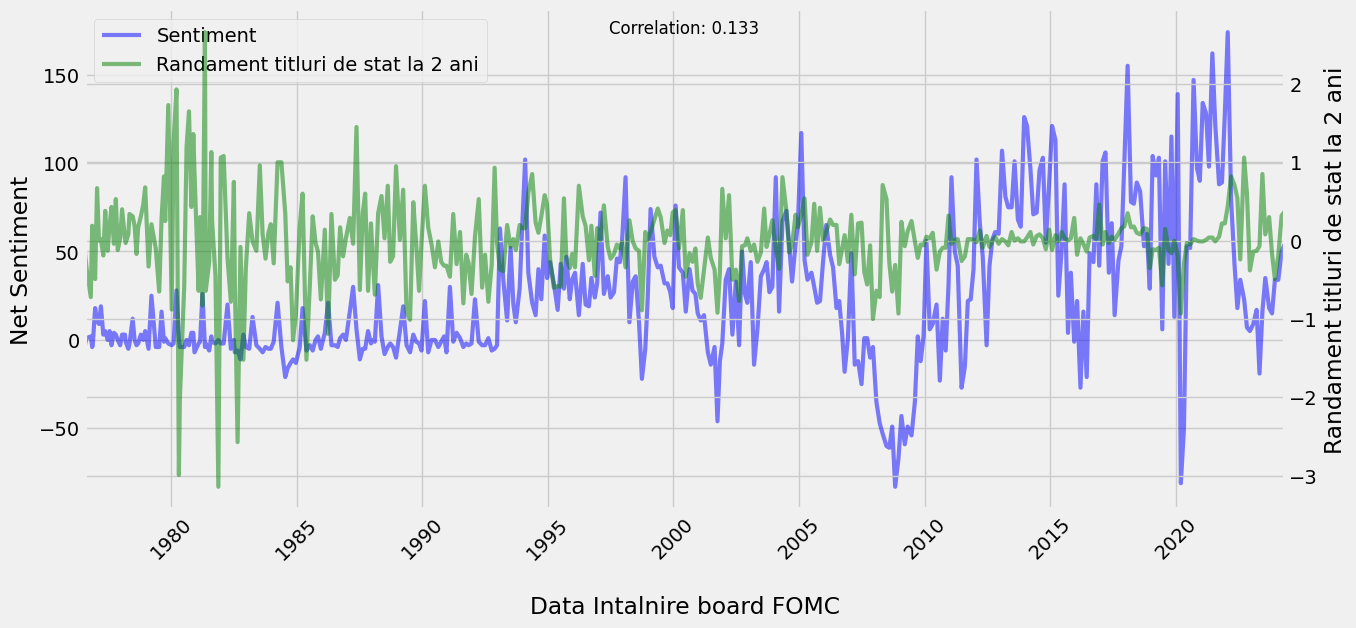

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reset the index to use it as a column for plotting
df_reset = df.reset_index()

fig = plt.figure(figsize=(12, 5))
line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = ax1.twinx()

lns1 = ax1.plot(df_reset['Date'], df_reset['Sentiment'], color='blue', lw=line_weight, alpha=alpha, label='Sentiment')
lns2 = ax2.plot(df_reset['Date'], df_reset['DGS2'], color='green', lw=line_weight, alpha=alpha, label='Randament titluri de stat la 2 ani')

market_corr = df['DGS2'].corr(df['Sentiment'])

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('', fontweight='bold', fontsize=18)
plt.suptitle('Correlation: {}'.format(round(market_corr, 3)), fontsize=12)

ax1.set(ylabel="Net Sentiment")
ax2.set(ylabel="Randament titluri de stat la 2 ani")
ax1.set(xlabel="\nData Intalnire board FOMC")

# Use AutoDateLocator and DateFormatter for x-axis
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Set the limits for the x-axis
ax1.set_xlim(df_reset['Date'].min(), df_reset['Date'].max())

plt.savefig('sentiment_corr.png', dpi=60, bbox_inches="tight")
plt.show()

In [ ]:
#Dickey Fuller test - helper function to check for stationarity in our time series

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Testul Augmented Dickey-Fuller: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['Testul ADF statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())   # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:

        print("Se respinge ipoteza nula")
        print("Seria de timp nu are o radacina unica si este stationara")
    else:

        print("Se accepta ipoteza alternativa")
        print("Seria de timp are o radacina unica si este nestationara")

adf_test(df['Sentiment'], title='Sentiment')

adf_test(df['DGS2'], title='DGS2')

Testul Augmented Dickey-Fuller: Sentiment
Testul ADF statistic    -2.822
p-value                  0.055
# lags used             17.000
# observations         383.000
critical value (1%)     -3.448
critical value (5%)     -2.869
critical value (10%)    -2.571
Se accepta ipoteza alternativa
Seria de timp are o radacina unica si este nestationara
Testul Augmented Dickey-Fuller: DGS2
Testul ADF statistic    -4.893
p-value                  0.000
# lags used             17.000
# observations         383.000
critical value (1%)     -3.448
critical value (5%)     -2.869
critical value (10%)    -2.571
Se respinge ipoteza nula
Seria de timp nu are o radacina unica si este stationara


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
data = df[['DGS2','Sentiment']]


print("***Sentiment signal***")
grangercausalitytests(data,maxlag=3);
print('_______________________________________')

***Sentiment signal***

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5043  , p=0.0619  , df_denom=397, df_num=1
ssr based chi2 test:   chi2=3.5308  , p=0.0602  , df=1
likelihood ratio test: chi2=3.5153  , p=0.0608  , df=1
parameter F test:         F=3.5043  , p=0.0619  , df_denom=397, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0299  , p=0.1327  , df_denom=394, df_num=2
ssr based chi2 test:   chi2=4.1112  , p=0.1280  , df=2
likelihood ratio test: chi2=4.0902  , p=0.1294  , df=2
parameter F test:         F=2.0299  , p=0.1327  , df_denom=394, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2276  , p=0.2993  , df_denom=391, df_num=3
ssr based chi2 test:   chi2=3.7487  , p=0.2899  , df=3
likelihood ratio test: chi2=3.7312  , p=0.2920  , df=3
parameter F test:         F=1.2276  , p=0.2993  , df_denom=391, df_num=3
_______________________________________


In [ ]:
#10 years treasury yields

In [ ]:
import pandas_datareader.data as web
import datetime

# Define the start and end dates for the data download
start_date = datetime.datetime(1972, 1, 1)
end_date = datetime.datetime(2024, 6, 11)

# Fetch the data from FRED
ticker = 'DGS10'
data = web.DataReader(ticker, 'fred', start_date, end_date)

# Display the data
print(data)

# Save the data to a CSV file
data.to_csv('DGS10_data_1972_2024.csv')

market = data


            DGS10
DATE             
1972-01-03   5.94
1972-01-04   5.93
1972-01-05   5.91
1972-01-06   5.90
1972-01-07   5.88
...           ...
2024-05-31   4.51
2024-06-03   4.41
2024-06-04   4.33
2024-06-05   4.29
2024-06-06   4.28

[13679 rows x 1 columns]


In [ ]:
#Need to fix the x axis to give both series the same length
resampled = market.reindex(NetSentiment.index, method='ffill')

import warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.concat([NetSentiment,resampled], axis=1)
df.rename(columns={0: 'Sentiment','DGS10':'DGS10'}, inplace=True)
df['DGS10'] = df['DGS10'].diff()
df = df.dropna(axis = 0, how ='any')
n_mos = df['DGS10'].shape[0]

try:
  return_per_period = (df['DGS10']+1).prod()**(1/n_mos) - 1
except:
  return_per_period = 0

df.head()

,Sentiment,DGS10
Date,,
1972-03-21,-9,0.200
1972-05-23,1,-0.030
1972-06-20,-1,0.030
1972-08-15,-8,0.090
1972-09-19,-3,0.380


In [ ]:
print(df.columns)
print(df.head())

Index(['Sentiment', 'DGS10'], dtype='object')
            Sentiment  DGS10
Date                        
1972-03-21         -9  0.200
1972-05-23          1 -0.030
1972-06-20         -1  0.030
1972-08-15         -8  0.090
1972-09-19         -3  0.380


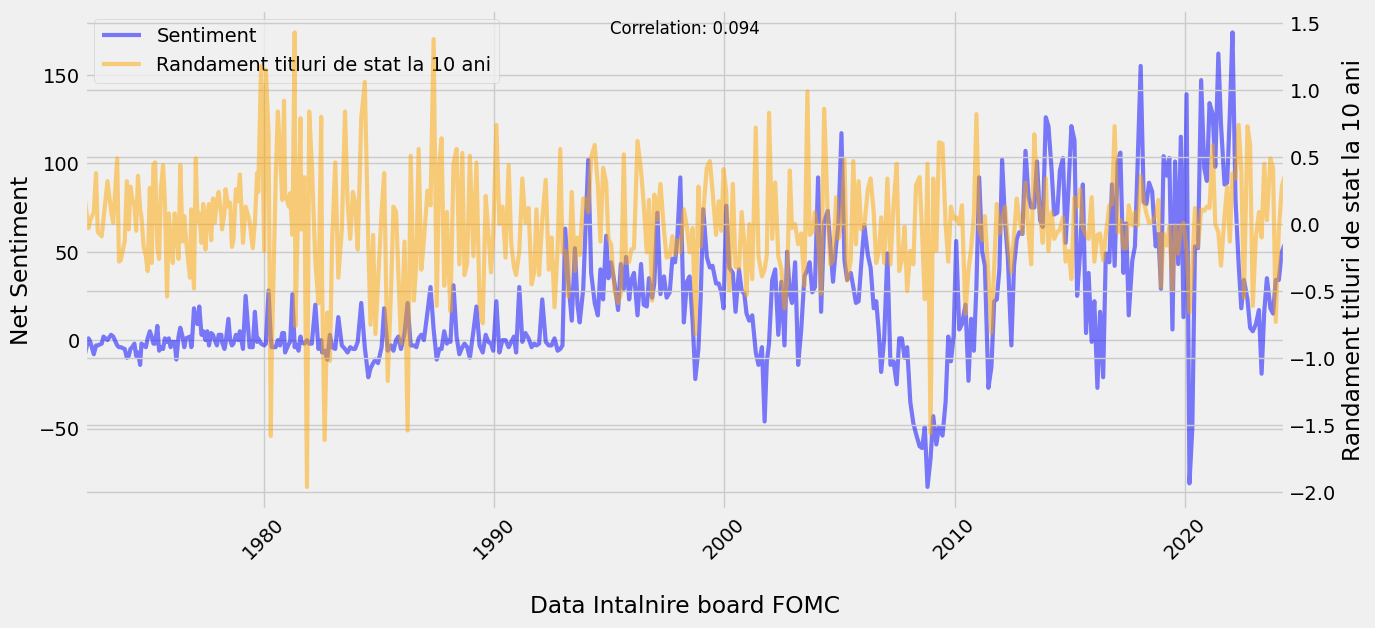

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Reset the index to use it as a column for plotting
df_reset = df.reset_index()

fig = plt.figure(figsize=(12, 5))
line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = ax1.twinx()

lns1 = ax1.plot(df_reset['Date'], df_reset['Sentiment'], color='blue', lw=line_weight, alpha=alpha, label='Sentiment')
lns2 = ax2.plot(df_reset['Date'], df_reset['DGS10'], color='orange', lw=line_weight, alpha=alpha, label='Randament titluri de stat la 10 ani')

market_corr = df['DGS10'].corr(df['Sentiment'])

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best')

plt.title('', fontweight='bold', fontsize=18)
plt.suptitle('Correlation: {}'.format(round(market_corr, 3)), fontsize=12)

ax1.set(ylabel="Net Sentiment")
ax2.set(ylabel="Randament titluri de stat la 10 ani")
ax1.set(xlabel="\nData Intalnire board FOMC")

# Use AutoDateLocator and DateFormatter for x-axis
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Set the limits for the x-axis
ax1.set_xlim(df_reset['Date'].min(), df_reset['Date'].max())

plt.savefig('sentiment_corr.png', dpi=60, bbox_inches="tight")
plt.show()

In [ ]:
#Dickey Fuller test - helper function to check for stationarity in our time series

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Testul Augmented Dickey-Fuller: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['Testul ADF statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())   # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:

        print("Se respinge ipoteza nula")
        print("Seria de timp nu are o radacina unica si este stationara")
    else:

        print("Se accepta ipoteza alternativa")
        print("Seria de timp are o radacina unica si este nestationara")

adf_test(df['Sentiment'], title='Sentiment')

adf_test(df['DGS10'], title='DGS10')

Testul Augmented Dickey-Fuller: Sentiment
Testul ADF statistic    -2.884
p-value                  0.047
# lags used             17.000
# observations         428.000
critical value (1%)     -3.446
critical value (5%)     -2.868
critical value (10%)    -2.570
Se respinge ipoteza nula
Seria de timp nu are o radacina unica si este stationara
Testul Augmented Dickey-Fuller: DGS10
Testul ADF statistic   -21.411
p-value                  0.000
# lags used              0.000
# observations         445.000
critical value (1%)     -3.445
critical value (5%)     -2.868
critical value (10%)    -2.570
Se respinge ipoteza nula
Seria de timp nu are o radacina unica si este stationara


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
data = df[['DGS10','Sentiment']]


print("***Sentiment signal***")
grangercausalitytests(data,maxlag=3);
print('_______________________________________')

***Sentiment signal***

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4008  , p=0.1220  , df_denom=442, df_num=1
ssr based chi2 test:   chi2=2.4171  , p=0.1200  , df=1
likelihood ratio test: chi2=2.4105  , p=0.1205  , df=1
parameter F test:         F=2.4008  , p=0.1220  , df_denom=442, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3864  , p=0.2511  , df_denom=439, df_num=2
ssr based chi2 test:   chi2=2.8044  , p=0.2461  , df=2
likelihood ratio test: chi2=2.7956  , p=0.2471  , df=2
parameter F test:         F=1.3864  , p=0.2511  , df_denom=439, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2924  , p=0.2765  , df_denom=436, df_num=3
ssr based chi2 test:   chi2=3.9394  , p=0.2681  , df=3
likelihood ratio test: chi2=3.9220  , p=0.2700  , df=3
parameter F test:         F=1.2924  , p=0.2765  , df_denom=436, df_num=3
_______________________________________
